# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        time.sleep(1) # for API key not to be disabled

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | woolgoolga
Processing Record 2 of Set 1 | copala
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | dryden
Processing Record 5 of Set 1 | n'zeto
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | taizhou
Processing Record 12 of Set 1 | kill devil hills
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | neiafu
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | tsiombe
Processing Record 19 of Set 1 | middlesboro
Processing Record 20 of Set 1 | yanykurgan
Processing Record 21 of Set 1 | stanley
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,woolgoolga,-30.1106,153.2007,85.95,71,0,19.35,AU,1732586841
1,copala,16.6500,-98.9833,77.02,84,10,3.00,MX,1732586937
2,petropavlovsk-kamchatsky,53.0452,158.6483,36.19,48,75,11.18,RU,1732586938
3,dryden,49.7833,-92.7503,21.49,86,100,11.50,CA,1732586939
4,n'zeto,-7.2312,12.8666,78.08,85,100,7.11,AO,1732586941


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,woolgoolga,-30.1106,153.2007,85.95,71,0,19.35,AU,1732586841
1,copala,16.6500,-98.9833,77.02,84,10,3.00,MX,1732586937
2,petropavlovsk-kamchatsky,53.0452,158.6483,36.19,48,75,11.18,RU,1732586938
3,dryden,49.7833,-92.7503,21.49,86,100,11.50,CA,1732586939
4,n'zeto,-7.2312,12.8666,78.08,85,100,7.11,AO,1732586941


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

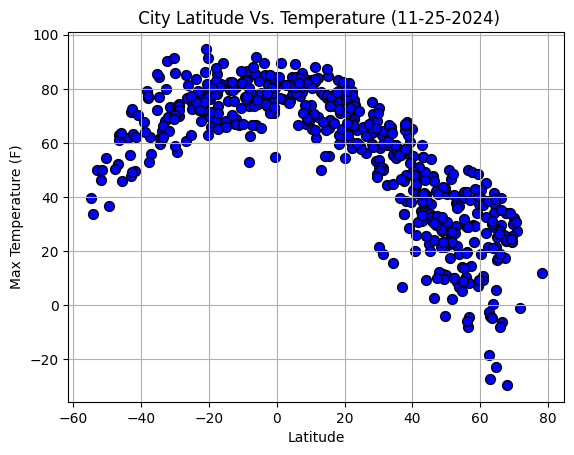

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color= "blue",
    edgecolor= "black",
    linewidths= 1,
    marker= "o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title(" City Latitude Vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

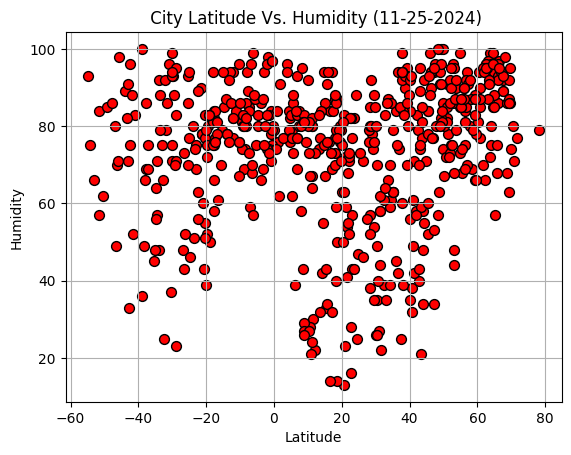

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color= "red",
    edgecolor= "black",
    linewidths= 1,
    marker= "o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title(" City Latitude Vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Show plot

plt.savefig("../output_data/Fig2.png")

# Show plot

plt.show()

#### Latitude Vs. Cloudiness

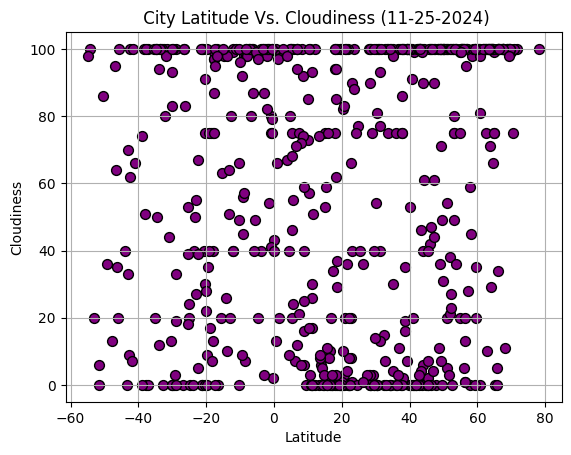

In [10]:
 plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color= "purple",
    edgecolor= "black",
    linewidths= 1,
    marker= "o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title(" City Latitude Vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

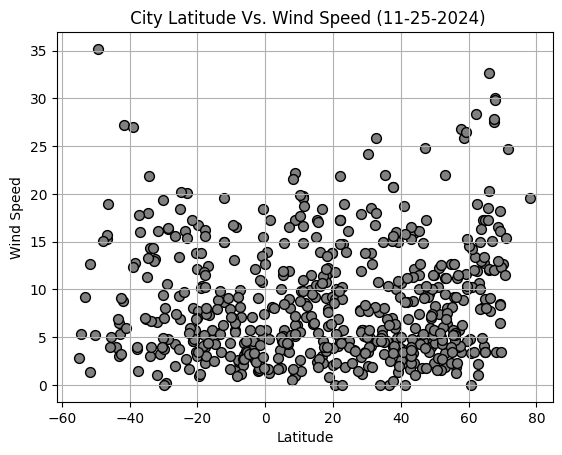

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color= "gray",
    edgecolor= "black",
    linewidths= 1,
    marker= "o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title(" City Latitude Vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# plot 
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,copala,16.6500,-98.9833,77.02,84,10,3.00,MX,1732586937
2,petropavlovsk-kamchatsky,53.0452,158.6483,36.19,48,75,11.18,RU,1732586938
3,dryden,49.7833,-92.7503,21.49,86,100,11.50,CA,1732586939
7,saipan,15.1355,145.7010,84.90,86,75,17.27,MP,1732586944
8,ixtapa,20.7000,-105.2000,76.23,83,0,0.00,MX,1732586945


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,woolgoolga,-30.1106,153.2007,85.95,71,0,19.35,AU,1732586841
4,n'zeto,-7.2312,12.8666,78.08,85,100,7.11,AO,1732586941
5,puerto natales,-51.7236,-72.4875,46.45,84,6,1.32,CL,1732586942
6,papatowai,-46.5619,169.4708,63.07,49,64,15.26,NZ,1732586695
9,port-aux-francais,-49.3500,70.2167,36.77,85,36,35.19,TF,1732586946


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7320750288191982


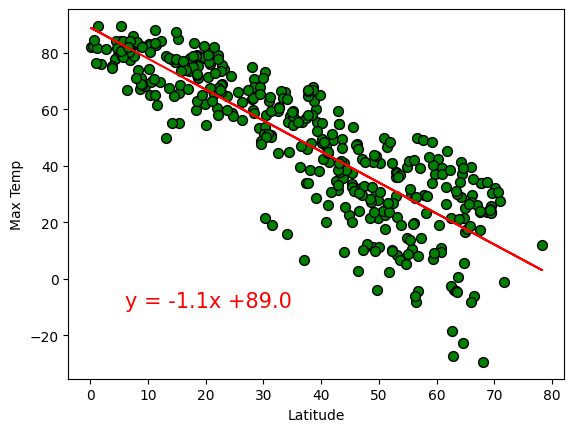

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "green")


The r-value is: 0.3432962660066733


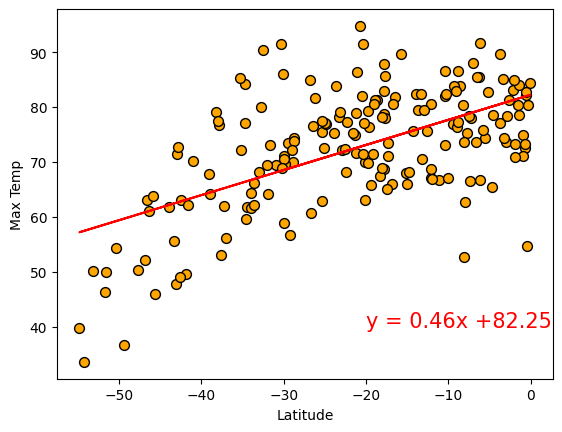

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-20, 40), "orange")

**Discussion about the linear relationship:** 
The r value for the northern hemisphere shows there is a strong positive correlation between latitude and max tempreture in the North. The r value for the southern hemisphere indicates weak postitive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11039977684657554


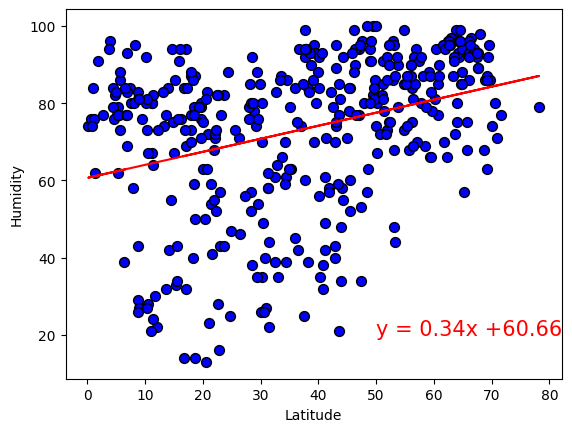

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,"Humidity",(50,20),"blue")

The r-value is: 0.04602893884581302


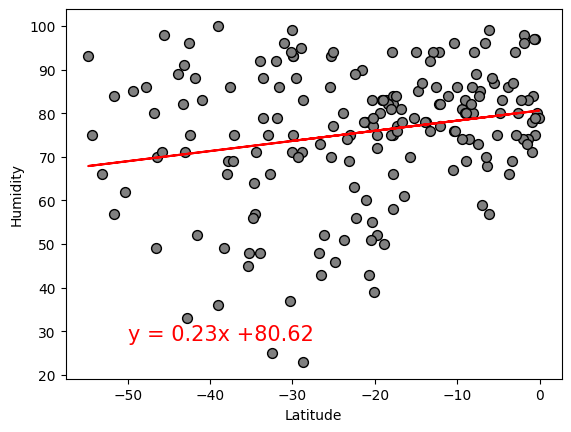

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity",(-50,28), "gray" )

**Discussion about the linear relationship:** 
The low r values in both hemispheres show there is weak to no relationship between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08266226308457028


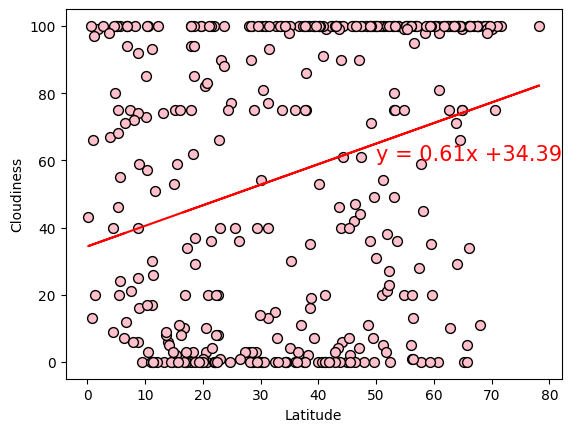

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,"Cloudiness",(50,60),"pink")

The r-value is: 0.04202394896105509


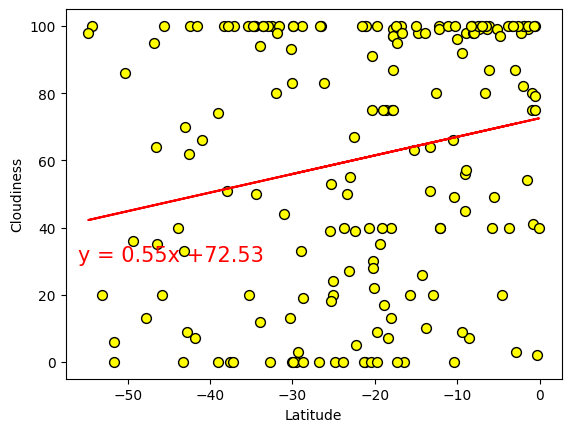

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,"Cloudiness",(-56,30),"yellow")

**Discussion about the linear relationship:** The low r values for both the northern and southern hemisphere indicate there is weak to no correlation between cloudiness and latitiudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02369357476268928


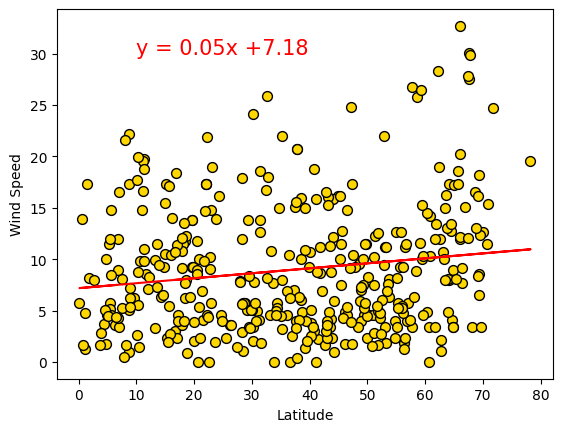

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,"Wind Speed",(10,30),"gold")

The r-value is: 0.05365533533388006


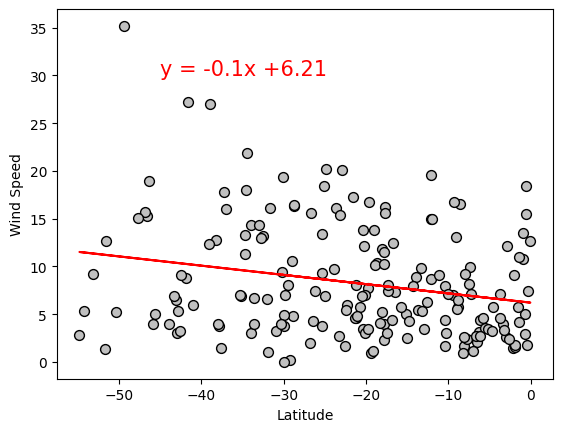

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,"Wind Speed",(-45,30),"silver")

**Discussion about the linear relationship:** The low r values for both the northern and southern hemisphere indicate there is weak to no correlation between Wind Speed and latitiudes.